In [1]:
import pandas as pd
import numpy as np
import json
import os

# Background

Exporting data from SQL:

```sh
heroku pg:psql
```

```sql
\copy (SELECT * FROM walkdata_js) TO walkdata_test.csv CSV DELIMITER ',' HEADER;
\copy (SELECT * FROM participants_js) TO participants_test.csv CSV DELIMITER ',' HEADER;
\copy (SELECT * FROM exp_js) TO experiment_test.csv CSV DELIMITER ',' HEADER;
```

```sh
gzip walkdata_test.csv
gzip participants_test.csv
gzip experiment_test.csv
```

In [17]:
data_dir = '~/Documents/Python/graphLearning/mTurk-10-trans-prob/'

# Preprocessing

First let's preprocess our data.

Correct column names.

Get rid of invalid data.

`Participants` contains info like start and end time, browser, etc.

It also contains all saved data, json-encoded in the `datastring` field.

In [21]:
participants = pd.read_csv("".join([data_dir, 'experiment/data/raw/participants_tp2.csv.gz']))
participants.head(n=10)

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,mode,datastring
0,A3MMEYJIBE5KAF:3GA6AFUKOPP5670S76HE4UE1IW73HT,3GA6AFUKOPP5670S76HE4UE1IW73HT,A3MMEYJIBE5KAF,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608195,NaN,NaN,0,3,NaN,NaN
1,A3S0INU046UTYK:3BDCF01OGYV886G6NCP2MG3L8EAYL0,3BDCF01OGYV886G6NCP2MG3L8EAYL0,A3S0INU046UTYK,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608291,NaN,NaN,0,3,NaN,NaN
2,ACNPJ7WXOGX5M:3CN4LGXD5YPCAY9LHKQL0Z1AMSFY47,3CN4LGXD5YPCAY9LHKQL0Z1AMSFY47,ACNPJ7WXOGX5M,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608359,NaN,NaN,0,3,NaN,NaN
3,A1NIK1THWWLKPY:3S4AW7T80CJSAZ2MY51V6RZEDF3L4Y,3S4AW7T80CJSAZ2MY51V6RZEDF3L4Y,A1NIK1THWWLKPY,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608423,NaN,NaN,0,3,NaN,NaN
4,A2VX8B1CJXRN2:3VJ40NV2QJOKX5K9QYIV6GF0OH4OTP,3VJ40NV2QJOKX5K9QYIV6GF0OH4OTP,A2VX8B1CJXRN2,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608486,NaN,NaN,0,3,NaN,NaN
5,ACVXBOS4CZGVQ:3UXUOQ9OKFY8X3T13CAC0P3DA337AR,3UXUOQ9OKFY8X3T13CAC0P3DA337AR,ACVXBOS4CZGVQ,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608549,NaN,NaN,0,3,NaN,NaN
6,A274NFT93QPBGL:317HQ483I8TC664MV7JEDKDMNQFINJ,317HQ483I8TC664MV7JEDKDMNQFINJ,A274NFT93QPBGL,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608611,NaN,NaN,0,3,NaN,NaN
7,A110JYKWR9T6H8:31LM9EDVOMT81HOSDP4EPLSMGE4JNU,31LM9EDVOMT81HOSDP4EPLSMGE4JNU,A110JYKWR9T6H8,33EEIIWHK8808P3KK45C8J2Z8JEVQO,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608673,NaN,NaN,0,3,NaN,NaN
8,A1A3TGZ7DKJWRW:3A9AA95ATXN0X3LK42DCS0ECIJ85PQ,3A9AA95ATXN0X3LK42DCS0ECIJ85PQ,A1A3TGZ7DKJWRW,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608734,NaN,NaN,0,3,NaN,NaN
9,A1G06ZVFHCPVOE:3ZV9H2YQQE8N3XVH253E5XOOXLS3W3,3ZV9H2YQQE8N3XVH253E5XOOXLS3W3,A1G06ZVFHCPVOE,304QEQWKZQLHUCPO2UPJYLH9VN70OF,NaN,NaN,NaN,NaN,NaN,NaN,dummy,2019-05-29 12:19:12.608795,NaN,NaN,0,3,NaN,NaN


Filter out data from other experiments

In [22]:
participants = participants[participants['hitid'] == "32CXT5U14H4UP6EOTKE7Q6GITKOU8I"]
participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2486 to 2565
Data columns (total 18 columns):
uniqueid          79 non-null object
assignmentid      79 non-null object
workerid          79 non-null object
hitid             79 non-null object
ipaddress         79 non-null object
browser           79 non-null object
platform          79 non-null object
language          79 non-null object
cond              79 non-null float64
counterbalance    79 non-null float64
codeversion       79 non-null object
beginhit          79 non-null object
beginexp          77 non-null object
endhit            51 non-null object
bonus             79 non-null int64
status            79 non-null int64
mode              79 non-null object
datastring        77 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 11.7+ KB


`Experiment` contains the custom model for each subject, listing their walk index.

In [23]:
experiment = pd.read_csv("".join([data_dir, '/experiment/data/raw/experiment_tp2.csv.gz']))
experiment.head(n=10)

,id,uniqueId,finger_mapping,walk_id,bonus_info
0,1,debugc8dG4:debug8JjiQ,"[[false, false, true, false, false, false, fal...",1,NaN
1,2,debugFB8GGF:debug9NXMQX,"[[false, false, false, false, false, false, tr...",2,NaN
2,3,debugH74ty:debugVdE2r,"[[false, false, false, false, false, false, fa...",3,NaN
3,4,debug8URQXJ:debugCRSICZ,"[[false, true, false, false, false, false, fal...",4,"{""walk_one_bonus"": 0.0, ""total_perf"": null, ""w..."
4,5,A2EFENZUAL6Z9V:3I3WADAZ9R5IC39JP2V14CMZL8G5O9,"[[false, false, false, false, false, false, tr...",5,NaN
5,6,A2EFENZUAL6Z9V:3PQMUDRV7S7KS5TVYR1Q9OUIELNII1,"[[false, false, false, false, false, false, tr...",6,"{""walk_two_bonus"": 0.0, ""total_perf"": null, ""w..."
6,227,A1VWP7HOSGKATD:317HQ483I8TC664MV7JEDKDSCFWNIK,"[[false, false, false, true, false, false, fal...",27,"{""walk_four_bonus"": 0.0, ""walk_two_bonus"": 1.5..."
7,7,A2EFENZUAL6Z9V:34J10VATJGZX93HEBZ6ZIQL45V4IQ4,"[[false, false, false, false, false, true, fal...",7,"{""total_perf"": 0.866, ""total_bonus"": 0.0, ""wal..."
8,9,A1HWB810RJBV2K:3Q5C1WP23N2XGB2IJ02MR4WKYX6155,"[[false, false, false, true, false, false, fal...",9,NaN
9,15,A3AS3TZQF4X6ZK:3IO1LGZLKAYBAFMHN4L6YKXS8YN68A,"[[false, false, false, false, false, false, fa...",15,NaN


`Walkdata` contains the walks used for each subject

In [24]:
walkdata = pd.read_csv("".join([data_dir, '/experiment/data/raw/walkdata_tp2.csv.gz']))
walkdata.head(n=10)

,walk_id,demo,walk_one,is_crosscluster,is_lattice,walk_two,walk_three,walk_four,nback_queries
0,1,"[1, 3, 2, 4, 5, 6, 7, 8, 9, 0]","[9, 6, 5, 4, 2, 3, 2, 1, 4, 3, 0, 9, 0, 2, 0, ...","[false, false, false, true, false, false, fals...",NaN,"[4, 5, 8, 5, 4, 5, 7, 5, 8, 7, 5, 7, 6, 5, 8, ...","[4, 2, 1, 2, 1, 2, 0, 1, 2, 4, 3, 2, 0, 3, 2, ...","[3, 2, 0, 2, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, ...",NaN
1,2,"[2, 4, 5, 6, 8, 7, 9, 0, 3, 1]","[3, 2, 4, 2, 4, 1, 2, 3, 4, 2, 3, 2, 1, 2, 1, ...","[false, false, false, false, false, false, fal...",NaN,"[7, 6, 8, 6, 5, 6, 7, 8, 7, 9, 7, 5, 8, 6, 5, ...","[2, 3, 0, 2, 0, 2, 1, 2, 4, 5, 6, 7, 6, 7, 9, ...","[7, 5, 6, 7, 5, 6, 7, 8, 9, 6, 7, 9, 6, 5, 4, ...",NaN
2,3,"[4, 5, 8, 6, 7, 9, 0, 1, 2, 3]","[0, 9, 8, 7, 6, 7, 5, 4, 3, 2, 0, 9, 6, 7, 6, ...","[false, true, false, false, false, false, fals...",NaN,"[1, 2, 0, 2, 0, 2, 1, 4, 3, 2, 3, 0, 9, 6, 8, ...","[3, 2, 3, 2, 3, 2, 4, 5, 8, 7, 6, 7, 9, 0, 2, ...","[6, 7, 8, 6, 8, 7, 9, 8, 9, 0, 1, 2, 0, 2, 1, ...",NaN
3,4,"[0, 9, 6, 8, 7, 5, 4, 2, 3, 1]","[3, 1, 3, 1, 0, 9, 7, 8, 7, 6, 8, 7, 6, 7, 5, ...","[false, false, false, false, false, true, fals...",NaN,"[6, 7, 8, 7, 5, 7, 5, 4, 3, 2, 4, 5, 8, 7, 6, ...","[7, 8, 5, 4, 3, 2, 4, 3, 2, 3, 0, 3, 1, 2, 3, ...","[6, 7, 6, 7, 8, 7, 8, 7, 9, 0, 2, 3, 0, 2, 1, ...",NaN
4,5,"[0, 9, 6, 7, 8, 5, 4, 3, 2, 1]","[3, 2, 0, 3, 2, 0, 3, 2, 3, 0, 9, 8, 7, 9, 8, ...","[false, false, false, false, false, false, fal...",NaN,"[4, 5, 7, 8, 7, 5, 6, 7, 5, 8, 7, 8, 6, 7, 9, ...","[1, 2, 4, 5, 8, 5, 6, 7, 6, 7, 5, 7, 6, 8, 7, ...","[3, 1, 2, 0, 9, 7, 5, 4, 3, 2, 3, 2, 0, 2, 0, ...",NaN
5,6,"[6, 8, 7, 5, 4, 2, 1, 3, 0, 9]","[9, 6, 9, 0, 1, 2, 1, 0, 9, 7, 9, 6, 7, 5, 4, ...","[false, false, false, true, false, false, fals...",NaN,"[6, 7, 6, 7, 8, 7, 5, 8, 7, 6, 7, 8, 6, 7, 8, ...","[0, 2, 4, 2, 1, 0, 1, 4, 3, 2, 0, 1, 2, 1, 2, ...","[0, 1, 2, 1, 2, 4, 3, 2, 1, 2, 3, 2, 4, 5, 4, ...",NaN
6,7,"[7, 5, 4, 2, 3, 1, 0, 9, 6, 8]","[0, 9, 8, 7, 8, 7, 6, 9, 8, 7, 5, 7, 5, 7, 8, ...","[false, true, false, false, false, false, fals...",NaN,"[2, 0, 1, 2, 3, 2, 0, 3, 4, 3, 2, 4, 1, 2, 4, ...","[7, 6, 7, 5, 7, 8, 7, 5, 6, 9, 6, 5, 4, 1, 2, ...","[3, 2, 3, 2, 1, 3, 2, 3, 4, 2, 4, 2, 3, 2, 4, ...",NaN
7,8,"[5, 4, 1, 3, 2, 0, 9, 8, 6, 7]","[8, 7, 9, 6, 7, 6, 9, 6, 7, 8, 7, 9, 8, 7, 6, ...","[false, false, false, false, false, false, fal...",NaN,"[0, 2, 1, 2, 1, 3, 4, 2, 3, 2, 0, 9, 0, 9, 7, ...","[2, 1, 0, 2, 4, 5, 7, 6, 7, 8, 7, 8, 5, 8, 9, ...","[3, 2, 1, 2, 4, 5, 7, 9, 6, 7, 9, 6, 7, 8, 7, ...",NaN
8,9,"[9, 7, 6, 8, 5, 4, 3, 2, 1, 0]","[5, 6, 7, 5, 4, 3, 2, 3, 2, 3, 2, 0, 1, 2, 1, ...","[false, false, false, false, true, false, fals...",NaN,"[2, 1, 2, 0, 9, 0, 1, 2, 4, 3, 2, 4, 1, 2, 0, ...","[1, 0, 2, 4, 5, 6, 9, 7, 9, 0, 1, 0, 1, 4, 3, ...","[2, 4, 3, 0, 2, 0, 9, 0, 1, 2, 4, 3, 4, 5, 8, ...",NaN
9,10,"[9, 8, 6, 7, 5, 4, 3, 2, 1, 0]","[8, 7, 5, 8, 5, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, ...","[false, false, false, false, false, false, fal...",NaN,"[2, 0, 1, 2, 4, 1, 2, 4, 1, 2, 0, 3, 2, 4, 1, ...","[2, 0, 9, 6, 9, 6, 7, 9, 0, 9, 6, 7, 6, 7, 9, ...","[7, 5, 4, 5, 8, 7, 9, 8, 6, 7, 6, 7, 8, 7, 9, ...",NaN


In [25]:
walkdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
walk_id            100 non-null int64
demo               100 non-null object
walk_one           100 non-null object
is_crosscluster    100 non-null object
is_lattice         0 non-null float64
walk_two           100 non-null object
walk_three         100 non-null object
walk_four          100 non-null object
nback_queries      0 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.1+ KB


# Export a new subject exclusion list

In [30]:
exclusion_list = participants[['workerid','hitid','assignmentid']]
# exclusion_list.to_csv('../data/subjects.csv.gz', index=False, compression='gzip')

# Datastring 

In [31]:
datastring = \
    participants.\
    loc[~participants.datastring.isnull()].\
    datastring.\
    apply(json.loads).\
    apply(pd.Series)

# N-Back Data

questiondata records the n-back data as a single entry for each subject.

We want to filter the rows that list the stage as 'n-back', and then we
can combine them into a single dataframe.

The different segments all seem to have different data, so we're separating the trial types out.

In [32]:
import zlib
import base64
from json import loads
def decompress_pako(datastring):
    """
    Decompress json data that we compressed in the browser with paco.
    Assumes data was then base64-encoded:
    btoa(pako.deflate(JSON.stringify(data), { to: 'string' }));
    Parameters
    ----------
    datastring : string
        base64-encoded json data to decompress
    Returns
    -------
    dict
        JSON-decoded and decompressed data
    """
    data = loads(zlib.decompress(base64.b64decode(datastring)))
    return data

In [50]:
# nback_data_list = []
# for row in datastring.itertuples(index=False):
#     if 'n-back' in row.questiondata:
#         data = pd.DataFrame(decompress_pako(row.questiondata['n-back']))
#         data['workerid'] = row.workerId
#         data['hitid'] = row.hitId
#         data['uniqueid'] = data.workerid + ':' + data.hitid
#         nback_data_list.append(data)
# nback_data = pd.concat(nback_data_list).reset_index(drop=True)

In [33]:
# def get_trial_type(trial_name):
#     return nback_data \
#         .loc[nback_data.trial_type == trial_name] \
#         .dropna(axis=1, how='all') \
#         .reset_index(drop=True)

# nback_text = get_trial_type('poldrack-text')
# nback_instructions = get_trial_type('poldrack-instructions')
# nback_categorize = get_trial_type('poldrack-categorize')
# nback_single_stim = get_trial_type('poldrack-single-stim')
# nback_survey = get_trial_type('survey-text')

#os.makedirs('../data/preprocessed/')
# nback_text.to_csv('preprocessed/nback_experiment_2/nback_text.csv.gz', compression='gzip')
# nback_instructions.to_csv('preprocessed/nback_experiment_2/nback_instructions.csv.gz', compression='gzip')
# nback_categorize.to_csv('preprocessed/nback_experiment_2/nback_categorize.csv.gz', compression='gzip')
# nback_single_stim.to_csv('preprocessed/nback_experiment_2/nback_single_stim.csv.gz', compression='gzip')
# nback_survey.to_csv('preprocessed/nback_experiment_2/nback_survey.csv.gz', compression='gzip')
exclusion_list.to_csv("".join([data_dir, 'experiment/data/preprocessed/all_prior_subjects.csv.gz']), index=False, compression='gzip')


# Participant/Walk Data

Need to join the experiment and walkdata tables

In [34]:
experiment_walk = pd.merge(experiment, walkdata, how='left', on='walk_id')
#experiment_walk.to_json("".join([data_dir, 'experiment/data/preprocessed/walkdata.json.gz']), compression='gzip')
experiment_walk['workerid'] = experiment_walk['uniqueId']
experiment_walk['workerid'] = experiment_walk['workerid'].apply(lambda x: x.split(':')[0])
experiment_walk.head(n=10)

,id,uniqueId,finger_mapping,walk_id,bonus_info,demo,walk_one,is_crosscluster,is_lattice,walk_two,walk_three,walk_four,nback_queries,workerid
0,1,debugc8dG4:debug8JjiQ,"[[false, false, true, false, false, false, fal...",1,NaN,"[1, 3, 2, 4, 5, 6, 7, 8, 9, 0]","[9, 6, 5, 4, 2, 3, 2, 1, 4, 3, 0, 9, 0, 2, 0, ...","[false, false, false, true, false, false, fals...",NaN,"[4, 5, 8, 5, 4, 5, 7, 5, 8, 7, 5, 7, 6, 5, 8, ...","[4, 2, 1, 2, 1, 2, 0, 1, 2, 4, 3, 2, 0, 3, 2, ...","[3, 2, 0, 2, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, ...",NaN,debugc8dG4
1,2,debugFB8GGF:debug9NXMQX,"[[false, false, false, false, false, false, tr...",2,NaN,"[2, 4, 5, 6, 8, 7, 9, 0, 3, 1]","[3, 2, 4, 2, 4, 1, 2, 3, 4, 2, 3, 2, 1, 2, 1, ...","[false, false, false, false, false, false, fal...",NaN,"[7, 6, 8, 6, 5, 6, 7, 8, 7, 9, 7, 5, 8, 6, 5, ...","[2, 3, 0, 2, 0, 2, 1, 2, 4, 5, 6, 7, 6, 7, 9, ...","[7, 5, 6, 7, 5, 6, 7, 8, 9, 6, 7, 9, 6, 5, 4, ...",NaN,debugFB8GGF
2,3,debugH74ty:debugVdE2r,"[[false, false, false, false, false, false, fa...",3,NaN,"[4, 5, 8, 6, 7, 9, 0, 1, 2, 3]","[0, 9, 8, 7, 6, 7, 5, 4, 3, 2, 0, 9, 6, 7, 6, ...","[false, true, false, false, false, false, fals...",NaN,"[1, 2, 0, 2, 0, 2, 1, 4, 3, 2, 3, 0, 9, 6, 8, ...","[3, 2, 3, 2, 3, 2, 4, 5, 8, 7, 6, 7, 9, 0, 2, ...","[6, 7, 8, 6, 8, 7, 9, 8, 9, 0, 1, 2, 0, 2, 1, ...",NaN,debugH74ty
3,4,debug8URQXJ:debugCRSICZ,"[[false, true, false, false, false, false, fal...",4,"{""walk_one_bonus"": 0.0, ""total_perf"": null, ""w...","[0, 9, 6, 8, 7, 5, 4, 2, 3, 1]","[3, 1, 3, 1, 0, 9, 7, 8, 7, 6, 8, 7, 6, 7, 5, ...","[false, false, false, false, false, true, fals...",NaN,"[6, 7, 8, 7, 5, 7, 5, 4, 3, 2, 4, 5, 8, 7, 6, ...","[7, 8, 5, 4, 3, 2, 4, 3, 2, 3, 0, 3, 1, 2, 3, ...","[6, 7, 6, 7, 8, 7, 8, 7, 9, 0, 2, 3, 0, 2, 1, ...",NaN,debug8URQXJ
4,5,A2EFENZUAL6Z9V:3I3WADAZ9R5IC39JP2V14CMZL8G5O9,"[[false, false, false, false, false, false, tr...",5,NaN,"[0, 9, 6, 7, 8, 5, 4, 3, 2, 1]","[3, 2, 0, 3, 2, 0, 3, 2, 3, 0, 9, 8, 7, 9, 8, ...","[false, false, false, false, false, false, fal...",NaN,"[4, 5, 7, 8, 7, 5, 6, 7, 5, 8, 7, 8, 6, 7, 9, ...","[1, 2, 4, 5, 8, 5, 6, 7, 6, 7, 5, 7, 6, 8, 7, ...","[3, 1, 2, 0, 9, 7, 5, 4, 3, 2, 3, 2, 0, 2, 0, ...",NaN,A2EFENZUAL6Z9V
5,6,A2EFENZUAL6Z9V:3PQMUDRV7S7KS5TVYR1Q9OUIELNII1,"[[false, false, false, false, false, false, tr...",6,"{""walk_two_bonus"": 0.0, ""total_perf"": null, ""w...","[6, 8, 7, 5, 4, 2, 1, 3, 0, 9]","[9, 6, 9, 0, 1, 2, 1, 0, 9, 7, 9, 6, 7, 5, 4, ...","[false, false, false, true, false, false, fals...",NaN,"[6, 7, 6, 7, 8, 7, 5, 8, 7, 6, 7, 8, 6, 7, 8, ...","[0, 2, 4, 2, 1, 0, 1, 4, 3, 2, 0, 1, 2, 1, 2, ...","[0, 1, 2, 1, 2, 4, 3, 2, 1, 2, 3, 2, 4, 5, 4, ...",NaN,A2EFENZUAL6Z9V
6,227,A1VWP7HOSGKATD:317HQ483I8TC664MV7JEDKDSCFWNIK,"[[false, false, false, true, false, false, fal...",27,"{""walk_four_bonus"": 0.0, ""walk_two_bonus"": 1.5...","[9, 0, 1, 3, 2, 4, 5, 7, 8, 6]","[1, 2, 0, 9, 8, 7, 5, 7, 9, 8, 5, 6, 9, 8, 7, ...","[false, false, false, true, false, false, fals...",NaN,"[6, 5, 8, 5, 6, 7, 8, 7, 8, 7, 5, 7, 9, 6, 7, ...","[3, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 4, 2, 1, ...","[8, 7, 6, 7, 6, 7, 6, 5, 8, 5, 7, 6, 7, 6, 7, ...",NaN,A1VWP7HOSGKATD
7,7,A2EFENZUAL6Z9V:34J10VATJGZX93HEBZ6ZIQL45V4IQ4,"[[false, false, false, false, false, true, fal...",7,"{""total_perf"": 0.866, ""total_bonus"": 0.0, ""wal...","[7, 5, 4, 2, 3, 1, 0, 9, 6, 8]","[0, 9, 8, 7, 8, 7, 6, 9, 8, 7, 5, 7, 5, 7, 8, ...","[false, true, false, false, false, false, fals...",NaN,"[2, 0, 1, 2, 3, 2, 0, 3, 4, 3, 2, 4, 1, 2, 4, ...","[7, 6, 7, 5, 7, 8, 7, 5, 6, 9, 6, 5, 4, 1, 2, ...","[3, 2, 3, 2, 1, 3, 2, 3, 4, 2, 4, 2, 3, 2, 4, ...",NaN,A2EFENZUAL6Z9V
8,9,A1HWB810RJBV2K:3Q5C1WP23N2XGB2IJ02MR4WKYX6155,"[[false, false, false, true, false, false, fal...",9,NaN,"[9, 7, 6, 8, 5, 4, 3, 2, 1, 0]","[5, 6, 7, 5, 4, 3, 2, 3, 2, 3, 2, 0, 1, 2, 1, ...","[false, false, false, false, true, false, fals...",NaN,"[2, 1, 2, 0, 9, 0, 1, 2, 4, 3, 2, 4, 1, 2, 0, ...","[1, 0, 2, 4, 5, 6, 9, 7, 9, 0, 1, 0, 1, 4, 3, ...","[2, 4

# Trial Data

Now separate out the quiz data and the trial data

In [35]:
taskdata_list = []
for row in datastring.itertuples(index=False):
    if 'compressed_task_data' in row.questiondata:
        data = pd.DataFrame(decompress_pako(row.questiondata['compressed_task_data']))
        data['workerid'] = row.workerId
        data['assignmentid'] = row.assignmentId
        data['uniqueid'] = data.workerid + ':' + data.assignmentid
        taskdata_list.append(data)
taskdata = pd.concat(taskdata_list).reset_index(drop=True)
taskdata.tail(n=10)

/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,assignmentid,block,correct,event,keyCode,nTries,node,phase,query,response,rt,stage,target,trial,uniqueid,workerid
45319,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,87.0,1.0,6.0,task,0.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",846.0,walk_four,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",70.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45320,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,66.0,1.0,7.0,task,0.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",732.0,walk_four,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",71.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45321,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,79.0,1.0,9.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",881.0,walk_four,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",72.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45322,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,66.0,1.0,7.0,task,0.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",831.0,walk_four,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",73.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45323,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,79.0,1.0,9.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",814.0,walk_four,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",74.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45324,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,81.0,1.0,0.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",833.0,walk_four,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",75.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45325,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,82.0,1.0,2.0,task,0.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",969.0,walk_four,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",76.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45326,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,81.0,1.0,0.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",771.0,walk_four,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",77.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45327,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,79.0,1.0,9.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1161.0,walk_four,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",78.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI
45328,3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,4.0,True,correct,81.0,1.0,0.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",838.0,walk_four,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",79.0,ABYFLJEHFDOPI:3C5W7UE9CGR3EJ8HIS4F3FB7V37XMD,ABYFLJEHFDOPI


In [44]:
quizdata_list = []
for row in datastring.itertuples(index=False):
    if 'compressed_quiz_1_data' in row.questiondata:
        data = pd.DataFrame(decompress_pako(row.questiondata['compressed_quiz_1_data']))
        data['workerid'] = row.workerId
        data['hitid'] = row.hitId
        data['uniqueid'] = data.workerid + ':' + data.hitid
        quizdata_list.append(data)
quizdata = pd.concat(quizdata_list).reset_index(drop=True)
quizdata.head(n=10)

,phase,qid,response,rt,workerid,hitid,uniqueid
0,quiz,1,1,6866,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
1,quiz,1,2,1927,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
2,quiz,1,3,3044,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
3,quiz,1,3,6877,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
4,quiz,1,2,11894,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
5,quiz,1,1,5440,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
6,quiz,1,3,7523,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
7,quiz,1,1,2977,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
8,quiz,1,1,7228,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I
9,quiz,1,1,1039,A1TJZFTCYX4ASU,32CXT5U14H4UP6EOTKE7Q6GITKOU8I,A1TJZFTCYX4ASU:32CXT5U14H4UP6EOTKE7Q6GITKOU8I


# Add Walk Info to taskdata

Depending on the experiment, you might not need all these fields. Pick and chose what you want

In [38]:
expdata = experiment_walk.drop(["bonus_info", 'is_crosscluster', "demo", "walk_one", "walk_two", "walk_three", "walk_four", "nback_queries"], axis=1)
expdata.rename(columns={'uniqueId':'uniqueid'}, inplace=True)
expdata.tail()

,id,uniqueid,finger_mapping,walk_id,is_lattice,workerid
238,216,A1J1PWS99LFVPL:3A4NIXBJ7708EPRS491RSLGKOTHMLY,"[[false, false, false, false, false, true, fal...",16,NaN,A1J1PWS99LFVPL
239,223,A106BMYKR3T8CH:30X31N5D64RUG1DTRF8NVGZFM6ZSAX,"[[false, true, false, false, false, false, fal...",23,NaN,A106BMYKR3T8CH
240,219,A3PDHDQZZKCTT5:3CFVK00FWMM6PM60HTUA3PJYYT1L6M,"[[false, false, false, false, false, false, fa...",19,NaN,A3PDHDQZZKCTT5
241,213,A2EHH2ZFIRF1BF:378XPAWRUDE5MNAXM3E9RETSD8XAIN,"[[false, false, false, false, false, false, fa...",13,NaN,A2EHH2ZFIRF1BF
242,222,A3I8HU3ZCHOROC:3QFUFYSY9ZG6A7SQCUYXBEU057D4FL,"[[false, false, false, false, false, false, fa...",22,NaN,A3I8HU3ZCHOROC


Summarise graph type, and change finger to categorical

In [34]:
expdata['is_lattice'] = expdata['is_lattice'].apply(lambda x: x[1])
expdata.tail()

TypeError: 'float' object has no attribute '__getitem__'

Now let's figure out who finished the task

In [39]:
finished_subjects = taskdata[(taskdata.trial == 249) & (taskdata.stage == "walk_four")].uniqueid.unique()

In [40]:
print("{} subjects complete".format(len(finished_subjects)))

36 subjects complete


Save list of finished and not finished hits so that you can review the HIT

In [95]:
approved_unique = taskdata[(taskdata.trial == 30) & (taskdata.stage == "walk_one")].uniqueid.unique()
approved = [x.split(':')[1] for x in approved_unique]

not_approved_unique = set(taskdata.uniqueid.unique()) - set(approved_unique)
not_approved = [x.split(':')[1] for x in not_approved_unique]

for x in approved:
    print('\'' + x + '\'')

'A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD'
'A1PC5HFTBIR2QA:3DYGAII7PM9PQP4IOU1FQB9934EQPM'
'A1QT7BQZVOBSY0:3VHHR074H4IPTMK503Z293JUT4LL7L'
'A3G50CZ5R70C36:3UJ1CZ6IZIQXAV1CWJH6N5JTUSYS5R'
'A2ALC6VYJ87XR1:3P529IW9KZM28FZBIMXEXVWBRS4FLJ'
'A3GICG9JOLMFR8:336KAV9KYRT27KUYD67X7K4IR342YF'
'AKNPKAI1X9W5Y:39JEC7537V2Y18RV5O9JCY9ALDEVC7'
'AI611QMBFQLBN:3N2BF7Y2VRV6ST82DOMT0TND7C8MHR'
'A3K7E8VMPN01DT:3LQ8PUHQFMTKWAIBS9O180GWQ3NIH6'
'A2L26DMSVUEDP6:3LRKMWOKB6I2CA439S9GLRDKXY92Z9'
'A3HNEYFOIJWPH1:3I2PTA7R3UVOFY72B2W7UUNA9U8QKL'
'A18E16UFE351U6:32UTUBMZ7HXFR3ZPRODO1E3S3SEVB0'
'A3KK1BNF5H0N1Z:38F71OA9GUXMEXHWIYYTX8B0RXUFML'
'AUN4BGGKSK045:3S0TNUHWKUJAVO1WXRTK4Q7KVFPD8K'
'AAQ0H553B0Y6B:338JKRMM2705QSZDGLWOR2SDDVIAHU'
'A2650XVK299ZL1:3CFVK00FWMM6PM60HTUA3PJYYT1L6M'
'A3FNC8ELMK8YJA:3S3AMIZX3V6C7RR9E39P6C33L6ADCQ'
'A2QWTQ4I70BRWO:36V4Q8R5ZL1J5M75WE9N97FEYZ3QMQ'
'AAIX34EBHHA8D:3FQ5JJ512MP3C1UAVA4QQ0S54JLNKV'
'A3R20AEJRD29WW:3IKZ72A5B5HSWF2WUZDTAN00WN4FNL'
'AK6J233HNO2S1:30X31N5D64RUG1DTRF8NVGZFM6ZSAX

check the ones who didn't finish to see how close they were. If they were sort of close pay them anyway

In [87]:
not_approved_unique

{u'A106BMYKR3T8CH:30X31N5D64RUG1DTRF8NVGZFM6ZSAX',
 u'A1DY3EW6Q0B5K5:3X73LLYYQ2FCABT2PP1TD8CDC2HNHR',
 u'A1LOUZD99NZCT2:39LNWE0K4VXP1WOVS8V0RF5MKC5IUP',
 u'A1M8BVZQFYW4N0:3IKZ72A5B5HSWF2WUZDTAN00WN4FNL',
 u'A1WQQCHIMZVZAN:32M8BPYGAUN6WEN0836JN04VB4HGIE',
 u'A1Y984VBNBN9Z1:3NC5L260MPNAE028VED6PC05MX9FO0',
 u'A2C84POENS2UNY:3PQMUDRV7S7KS5TVYR6M8CHBQG2IIZ',
 u'A2EZNZ6X58RTNR:3XCC1ODXDMCA22KX1M54V69O4M3RQG',
 u'A2JEEP3AEYHTHT:374TNBHA8CWJZ3WJFHXY322L7AKYQT',
 u'A2OGID6HB9773:32N49TQG3HJA8TUXLADS63JMLATVA5',
 u'A2Z757E0JZ6G3Z:3OWEPKL08ADFHMNQCGFHMVNJY017NR',
 u'ADTIO3A6TM9CG:3N1FSUEFL619CNEULO37NERFTTTD4D',
 u'AMJ0HTBNKRRAV:3PJUZCGDJ7HYSYOFLBOIIUOU4VC983',
 u'AQWH9UY6FVU21:3JAOYWH7VJ5T758YF0XMNZA0OU9L9X'}

In [76]:
# trial 2 A106BMYKR3T8CH:30X31N5D64RUG1DTRF8NVGZFM6ZSAX
# demo A1DY3EW6Q0B5K5:3X73LLYYQ2FCABT2PP1TD8CDC2HNHR
# demo A1LOUZD99NZCT2:39LNWE0K4VXP1WOVS8V0RF5MKC5IUP
# trial 1 A1M8BVZQFYW4N0:3IKZ72A5B5HSWF2WUZDTAN00WN4FNL
# demo A1WQQCHIMZVZAN:32M8BPYGAUN6WEN0836JN04VB4HGIE
# trial 1 A1Y984VBNBN9Z1:3NC5L260MPNAE028VED6PC05MX9FO0
# demo A2C84POENS2UNY:3PQMUDRV7S7KS5TVYR6M8CHBQG2IIZ
# demo A2EZNZ6X58RTNR:3XCC1ODXDMCA22KX1M54V69O4M3RQG
# trial 1 A2JEEP3AEYHTHT:374TNBHA8CWJZ3WJFHXY322L7AKYQT
# trail 1 A2OGID6HB9773:32N49TQG3HJA8TUXLADS63JMLATVA5
# demo A2Z757E0JZ6G3Z:3OWEPKL08ADFHMNQCGFHMVNJY017NR
# demo ADTIO3A6TM9CG:3N1FSUEFL619CNEULO37NERFTTTD4D
# trial 2 AMJ0HTBNKRRAV:3PJUZCGDJ7HYSYOFLBOIIUOU4VC983
# trial 0 AQWH9UY6FVU21:3JAOYWH7VJ5T758YF0XMNZA0OU9L9X


taskdata[taskdata['uniqueid'] == 'AQZM81DMVPHW5:3Z4XG4ZF49SOTU6DORUWYXACBY68XO'].tail(n=3)

,assignmentid,block,correct,event,keyCode,nTries,node,phase,query,response,rt,stage,target,trial,uniqueid,workerid
40112,3Z4XG4ZF49SOTU6DORUWYXACBY68XO,1.0,True,correct,73.0,1.0,7.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",867.0,walk_one,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",243.0,AQZM81DMVPHW5:3Z4XG4ZF49SOTU6DORUWYXACBY68XO,AQZM81DMVPHW5
40113,3Z4XG4ZF49SOTU6DORUWYXACBY68XO,1.0,True,correct,80.0,1.0,8.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2681.0,walk_one,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",244.0,AQZM81DMVPHW5:3Z4XG4ZF49SOTU6DORUWYXACBY68XO,AQZM81DMVPHW5
40114,3Z4XG4ZF49SOTU6DORUWYXACBY68XO,1.0,True,correct,73.0,1.0,7.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",12228.0,walk_one,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",245.0,AQZM81DMVPHW5:3Z4XG4ZF49SOTU6DORUWYXACBY68XO,AQZM81DMVPHW5


In [93]:
for x in not_approved:
    print('\'' + x + '\'')

'3PJUZCGDJ7HYSYOFLBOIIUOU4VC983'
'32N49TQG3HJA8TUXLADS63JMLATVA5'
'3N1FSUEFL619CNEULO37NERFTTTD4D'
'39LNWE0K4VXP1WOVS8V0RF5MKC5IUP'
'3NC5L260MPNAE028VED6PC05MX9FO0'
'374TNBHA8CWJZ3WJFHXY322L7AKYQT'
'3X73LLYYQ2FCABT2PP1TD8CDC2HNHR'
'30X31N5D64RUG1DTRF8NVGZFM6ZSAX'
'3OWEPKL08ADFHMNQCGFHMVNJY017NR'
'32M8BPYGAUN6WEN0836JN04VB4HGIE'
'3JAOYWH7VJ5T758YF0XMNZA0OU9L9X'
'3XCC1ODXDMCA22KX1M54V69O4M3RQG'
'3IKZ72A5B5HSWF2WUZDTAN00WN4FNL'
'3PQMUDRV7S7KS5TVYR6M8CHBQG2IIZ'


In [45]:
finished_taskdata = taskdata[taskdata.uniqueid.isin(finished_subjects)]
finished_quizdata = quizdata[quizdata.uniqueid.isin(finished_subjects)]

Add info by uniqueid

In [98]:
expanded_walkdata = pd.DataFrame()
for s in finished_taskdata['uniqueid'].unique():
    nTrial = sum(finished_taskdata['uniqueid'] == s)
    
    if any(expdata['uniqueid'] == s):
        curr = expdata[expdata['uniqueid'] == s]
        for i in range(nTrial):
            expanded_walkdata = expanded_walkdata.append(curr)
    else:
        print('Hmmm...there are subjects in your taskdata that aren\'t in your walkdata. Did you load the correct dataset?')
    
expanded_walkdata.head()
    

,id,uniqueid,finger_mapping,walk_id,is_lattice,workerid
195,165,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,"[[false, false, false, false, false, false, fa...",65,NaN,A1TJZFTCYX4ASU
195,165,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,"[[false, false, false, false, false, false, fa...",65,NaN,A1TJZFTCYX4ASU
195,165,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,"[[false, false, false, false, false, false, fa...",65,NaN,A1TJZFTCYX4ASU
195,165,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,"[[false, false, false, false, false, false, fa...",65,NaN,A1TJZFTCYX4ASU
195,165,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,"[[false, false, false, false, false, false, fa...",65,NaN,A1TJZFTCYX4ASU


In [99]:
expanded_walkdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38820 entries, 195 to 141
Data columns (total 6 columns):
id                38820 non-null int64
uniqueid          38820 non-null object
finger_mapping    38820 non-null object
walk_id           38820 non-null int64
is_lattice        0 non-null float64
workerid          38820 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ MB


In [100]:
finished_taskdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38820 entries, 0 to 44409
Data columns (total 20 columns):
assignmentid      38820 non-null object
block             38406 non-null float64
correct           38820 non-null object
event             38820 non-null object
keyCode           38820 non-null float64
nTries            38820 non-null float64
node              38820 non-null float64
phase             38820 non-null object
query             38820 non-null float64
response          38820 non-null object
rt                38820 non-null float64
stage             38820 non-null object
target            38820 non-null object
trial             38820 non-null float64
uniqueid          38820 non-null object
workerid          38820 non-null object
id                38820 non-null object
finger_mapping    38820 non-null object
walk_id           38820 non-null object
is_lattice        38820 non-null object
dtypes: float64(7), object(13)
memory usage: 6.2+ MB


Combine task and walkdata

In [101]:
for field in expdata.drop('uniqueid', axis=1).columns:
    finished_taskdata[field] = ''


/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [102]:
for s in finished_taskdata['uniqueid'].unique():
    for field in expdata.drop('uniqueid', axis=1).columns:
        curr = expdata.loc[expdata['uniqueid'] == s,field]
        finished_taskdata.loc[finished_taskdata['uniqueid'] == s,field] = curr.values
    

/Users/stiso/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [103]:
finished_taskdata.head()

,assignmentid,block,correct,event,keyCode,nTries,node,phase,query,response,rt,stage,target,trial,uniqueid,workerid,id,finger_mapping,walk_id,is_lattice
0,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,81.0,1.0,1.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1010.0,demo,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN
1,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,82.0,1.0,4.0,task,0.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",776.0,demo,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN
2,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,False,incorrect,79.0,1.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",849.0,demo,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN
3,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,80.0,2.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",5387.0,demo,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN
4,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,69.0,1.0,7.0,task,0.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",720.0,demo,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",3.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN


In [104]:
finished_taskdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38820 entries, 0 to 44409
Data columns (total 20 columns):
assignmentid      38820 non-null object
block             38406 non-null float64
correct           38820 non-null object
event             38820 non-null object
keyCode           38820 non-null float64
nTries            38820 non-null float64
node              38820 non-null float64
phase             38820 non-null object
query             38820 non-null float64
response          38820 non-null object
rt                38820 non-null float64
stage             38820 non-null object
target            38820 non-null object
trial             38820 non-null float64
uniqueid          38820 non-null object
workerid          38820 non-null object
id                38820 non-null int64
finger_mapping    38820 non-null object
walk_id           38820 non-null int64
is_lattice        0 non-null object
dtypes: float64(7), int64(2), object(11)
memory usage: 6.2+ MB


# Add additional fields

Is the trial cross cluster

In [105]:
finished_taskdata['is_crosscluster'] = np.nan
for index, row in finished_taskdata.iterrows():
    if row['nTries'] == 1:
        if row['trial'] == 0:
            finished_taskdata.loc[index,'is_crosscluster'] = False
        else:
            prev = finished_taskdata.loc[index-1,'node']
            curr = row['node']
            if (prev in [4,5] and curr in [4,5]) or (prev in [0,9] and curr in [0,9]) and (prev != curr):
                finished_taskdata.loc[index,'is_crosscluster'] = True
            else:
                finished_taskdata.loc[index,'is_crosscluster'] = False
    else:
        finished_taskdata.loc[index,'is_crosscluster'] = finished_taskdata.loc[index-1,'is_crosscluster']

finished_taskdata.head()      

/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,assignmentid,block,correct,event,keyCode,nTries,node,phase,query,response,...,stage,target,trial,uniqueid,workerid,id,finger_mapping,walk_id,is_lattice,is_crosscluster
0,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,81.0,1.0,1.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,demo,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False
1,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,82.0,1.0,4.0,task,0.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,demo,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False
2,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,False,incorrect,79.0,1.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,demo,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True
3,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,80.0,2.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,demo,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True
4,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,69.0,1.0,7.0,task,0.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,demo,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",3.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False


In [106]:
finished_taskdata.drop('assignmentid', axis=1)

,block,correct,event,keyCode,nTries,node,phase,query,response,rt,stage,target,trial,uniqueid,workerid,id,finger_mapping,walk_id,is_lattice,is_crosscluster
0,NaN,True,correct,81.0,1.0,1.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1010.0,demo,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False
1,NaN,True,correct,82.0,1.0,4.0,task,0.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",776.0,demo,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False
2,NaN,False,incorrect,79.0,1.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",849.0,demo,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True
3,NaN,True,correct,80.0,2.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",5387.0,demo,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True
4,NaN,True,correct,69.0,1.0,7.0,task,0.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",720.0,demo,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",3.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False
5,NaN,True,correct,85.0,1.0,6.0,task,0.0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",569.0,demo,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",4.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False
6,NaN,True,correct,87.0,1.0,8.0,task,0.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",560.0,demo,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",5.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False
7,NaN,True,correct,73.0,1.0,9.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",552.0,demo,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",6.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False
8,NaN,True,correct,79.0,1.0,0.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",564.0,demo,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",7.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True
9,NaN,True,correct,66.0,1.0,2.0,task,0.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",1957.0,demo,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",8.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False


Which hand was used

In [107]:
code_map = {81:'left',
            87:'left',
            69:'left',
            82:'left',
            86:'left',
            66:'right',
            85:'right',
            73:'right',
            79:'right',
            80:'right',}

finished_taskdata['hand'] = finished_taskdata['keyCode'].apply(lambda x: code_map.get(x))

/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [108]:
finished_taskdata.head()

,assignmentid,block,correct,event,keyCode,nTries,node,phase,query,response,...,target,trial,uniqueid,workerid,id,finger_mapping,walk_id,is_lattice,is_crosscluster,hand
0,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,81.0,1.0,1.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left
1,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,82.0,1.0,4.0,task,0.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left
2,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,False,incorrect,79.0,1.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True,right
3,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,80.0,2.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True,right
4,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,69.0,1.0,7.0,task,0.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",3.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left


Was this a hand transition?

In [109]:
finished_taskdata['hand_transition'] = np.nan
for index, row in finished_taskdata.iterrows():
    if row['nTries'] == 1:
        if row['trial'] == 0:
            finished_taskdata.loc[index,'hand_transition'] = False
        else:
            prev = finished_taskdata.loc[index-1,'hand']
            curr = row['hand']
            if (prev != curr):
                finished_taskdata.loc[index,'hand_transition'] = True
            else:
                finished_taskdata.loc[index,'hand_transition'] = False
    else:
        finished_taskdata.loc[index,'hand_transition'] = finished_taskdata.loc[index-1,'hand_transition']

finished_taskdata.head() 

/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,assignmentid,block,correct,event,keyCode,nTries,node,phase,query,response,...,trial,uniqueid,workerid,id,finger_mapping,walk_id,is_lattice,is_crosscluster,hand,hand_transition
0,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,81.0,1.0,1.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,False
1,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,82.0,1.0,4.0,task,0.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,1.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,False
2,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,False,incorrect,79.0,1.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True,right,True
3,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,80.0,2.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,2.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True,right,True
4,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,69.0,1.0,7.0,task,0.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,3.0,A1TJZFTCYX4ASU:3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,True


Lag and recency

In [110]:
# lag - how many times has this shownup in the last 10 trials?
# recency - how long since last presentation?
prev_display = {0: np.nan,
            1: np.nan,
            2: np.nan,
            3: np.nan,
            4: np.nan,
            5: np.nan,
            6: np.nan,
            7: np.nan,
            8: np.nan,
            9: np.nan}
lag10 = [np.nan]*10

finished_taskdata['lag10'] = np.nan
finished_taskdata['recency'] = np.nan
for index, row in finished_taskdata.iterrows():
    if row['nTries'] == 1:
        # what node are we on?
        curr_node = finished_taskdata.loc[index,'node']
        
        if row['trial'] == 0:
            # reset stack and dictionary for new stages
            prev_display = {0: np.nan,
                            1: np.nan,
                            2: np.nan,
                            3: np.nan,
                            4: np.nan,
                            5: np.nan,
                            6: np.nan,
                            7: np.nan,
                            8: np.nan,
                            9: np.nan}
            lag10 = [np.nan]*10
            
            
            finished_taskdata.loc[index,'lag10'] = 0
            finished_taskdata.loc[index,'recency'] = np.nan
            
        else:
            # recency
            # add recency of previous node
            finished_taskdata.loc[index,'recency'] = finished_taskdata.loc[index,'trial'] - prev_display[curr_node]
            
            # lag10
            finished_taskdata.loc[index,'lag10'] = sum(curr_node == lag10)
        
        # add this to the last 10 nodes stack
        lag10.pop(0)
        lag10.append(curr_node)
        
        # log trial number of current node
        prev_display[curr_node] = finished_taskdata.loc[index,'trial']
            
    else:
        finished_taskdata.loc[index,'lag10'] = finished_taskdata.loc[index-1,'lag10']
        finished_taskdata.loc[index,'recency'] = finished_taskdata.loc[index-1,'recency']

finished_taskdata.head() 

/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,assignmentid,block,correct,event,keyCode,nTries,node,phase,query,response,...,workerid,id,finger_mapping,walk_id,is_lattice,is_crosscluster,hand,hand_transition,lag10,recency
0,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,81.0,1.0,1.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,False,0.0,NaN
1,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,82.0,1.0,4.0,task,0.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,False,0.0,NaN
2,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,False,incorrect,79.0,1.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True,right,True,0.0,NaN
3,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,80.0,2.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,True,right,True,0.0,NaN
4,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,69.0,1.0,7.0,task,0.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,A1TJZFTCYX4ASU,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,True,0.0,NaN


Probability

In [113]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(1,2), (8,7), (6,7), (3,2)], weight=0.7)
G.add_edges_from([(6,8), (6,9), (6,5), (8,9), (8,6), (8,5), (1,3), (1,4), (1,0), (3,1),
                                (3,4), (3,0)], weight=0.1)
G.add_edges_from([(0,1), (0,2), (0,3), (0,9), (4,2), (4,1), (4,3), (4,5),
                                (9,6), (9,7), (9,0), (9,8), (5,6), (5,8), (5,7), (5,4),
                                (2,1), (2,0), (2,3), (2,4), (7,5), (7,6), (7,8), (7,9)], weight=0.25)
list(G.edges(data='weight'))


[(0, 1, 0.25),
 (0, 2, 0.25),
 (0, 3, 0.25),
 (0, 9, 0.25),
 (1, 0, 0.1),
 (1, 2, 0.7),
 (1, 3, 0.1),
 (1, 4, 0.1),
 (2, 0, 0.25),
 (2, 1, 0.25),
 (2, 3, 0.25),
 (2, 4, 0.25),
 (3, 0, 0.1),
 (3, 1, 0.1),
 (3, 2, 0.7),
 (3, 4, 0.1),
 (4, 1, 0.25),
 (4, 2, 0.25),
 (4, 3, 0.25),
 (4, 5, 0.25),
 (5, 8, 0.25),
 (5, 4, 0.25),
 (5, 6, 0.25),
 (5, 7, 0.25),
 (6, 8, 0.1),
 (6, 9, 0.1),
 (6, 5, 0.1),
 (6, 7, 0.7),
 (7, 8, 0.25),
 (7, 9, 0.25),
 (7, 5, 0.25),
 (7, 6, 0.25),
 (8, 9, 0.1),
 (8, 5, 0.1),
 (8, 6, 0.1),
 (8, 7, 0.7),
 (9, 0, 0.25),
 (9, 8, 0.25),
 (9, 6, 0.25),
 (9, 7, 0.25)]

In [114]:
finished_taskdata['probability'] = np.nan
for index, row in finished_taskdata.iterrows():
    if row['nTries'] == 1:
        if row['trial'] == 0:
            finished_taskdata.loc[index,'probability'] = 0.1
        else:
            prev = finished_taskdata.loc[index-1,'node']
            curr = row['node']
            try:
                finished_taskdata.loc[index,'probability'] = G[prev][curr]['weight']
            except:
                finished_taskdata.loc[index,'probability'] = 0
    else:
        finished_taskdata.loc[index,'probability'] = finished_taskdata.loc[index-1,'probability']

finished_taskdata.head()      

/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,assignmentid,block,correct,event,keyCode,nTries,node,phase,query,response,...,id,finger_mapping,walk_id,is_lattice,is_crosscluster,hand,hand_transition,lag10,recency,probability
0,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,81.0,1.0,1.0,task,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,False,0.0,NaN,0.10
1,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,82.0,1.0,4.0,task,0.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,False,0.0,NaN,0.10
2,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,False,incorrect,79.0,1.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,165,"[[false, false, false, false, false, false, fa...",65,NaN,True,right,True,0.0,NaN,0.25
3,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,80.0,2.0,5.0,task,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,165,"[[false, false, false, false, false, false, fa...",65,NaN,True,right,True,0.0,NaN,0.25
4,3JCG6DTRV4RAQ15XO7G4QGZJ800QQD,NaN,True,correct,69.0,1.0,7.0,task,0.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,165,"[[false, false, false, false, false, false, fa...",65,NaN,False,left,True,0.0,NaN,0.25


Communicability

In [ ]:
import scipy.linalg as sp
import matplotlib.pyplot as plt

mod = np.array([[0,1,1,1,0,0,0,0,0,1],
              [1,0,1,1,1,0,0,0,0,0],
              [1,1,0,1,1,0,0,0,0,0],
              [1,1,1,0,1,0,0,0,0,0],
              [0,1,1,1,0,1,0,0,0,0],
              [0,0,0,0,1,0,1,1,1,0],
              [0,0,0,0,0,1,0,1,1,1],
              [0,0,0,0,0,1,1,0,1,1],
              [0,0,0,0,0,1,1,1,0,1],
              [1,0,0,0,0,0,1,1,1,0]])

lat = np.array([[0,1,1,0,0,0,0,0,1,1],
              [1,0,1,1,0,0,0,0,0,1],
              [1,1,0,1,1,0,0,0,0,0],
              [0,1,1,0,1,1,0,0,0,0],
              [0,0,1,1,0,1,1,0,0,0],
              [0,0,0,1,1,0,1,1,0,0],
              [0,0,0,0,1,1,0,1,1,0],
              [0,0,0,0,0,1,1,0,1,1],
              [1,0,0,0,0,0,1,1,0,1],
              [1,1,0,0,0,0,0,1,1,0]])

g_mod = np.round(sp.expm(mod), decimals=3)
g_lat = np.round(sp.expm(lat), decimals = 3)

f, axes = plt.subplots(1, 2, figsize = (16,6))
sns.heatmap(g_mod, ax=axes[0])
sns.heatmap(g_lat, ax=axes[1])


In [ ]:
finished_taskdata['communicability'] = np.nan
for index, row in finished_taskdata.iterrows():
    if row['nTries'] == 1:
        if row['trial'] == 0:
            finished_taskdata.loc[index,'communicability'] = np.nan
        else:
            prev = finished_taskdata.loc[index-1,'node']
            curr = row['node']
            graph_type = row['is_lattice']
            if (graph_type):
                finished_taskdata.loc[index,'communicability'] = g_lat[int(prev),int(curr)]
            else:
                finished_taskdata.loc[index,'communicability'] = g_mod[int(prev),int(curr)]
    else:
        finished_taskdata.loc[index,'communicability'] = finished_taskdata.loc[index-1,'communicability']

finished_taskdata.head() 

In [115]:
finished_taskdata = finished_taskdata.drop(['assignmentid','uniqueid', 'finger_mapping','response'],axis=1)

Save the final data

In [135]:
finished_taskdata.to_csv("".join([data_dir,'experiment/data/preprocessed/taskdata2.csv.gz']), compression='gzip')
finished_quizdata.to_csv("".join([data_dir,'experiment/data/preprocessed/quizdata2.csv.gz']), compression='gzip')

# Check feedback

In [117]:
[x['free_response_question'] for x in datastring.questiondata if 'free_response_question' in x]

[u'this would be easier if i saw the letters and used a normal hand position',
 u'good',
 u'',
 u'',
 u'',
 u"I wonder if it's about our minds trying to find a pattern so we think mentally before we see visually.",
 u'',
 u'Seemed to have a pattern then pattern changed to compare muscle memory mistakes.',
 u'',
 u'',
 u"Way underpaid. For the repetitive, hard work involved, you pay less than minimum wage....Myself and other workers are going to feel like we're being treated like third world workers working in a sweat shop by the rate of pay.",
 u'',
 u'I did get better and more accurate the longer it went on',
 u'thanks',
 u'',
 u'',
 u'',
 u'',
 u'no',
 u'',
 u'',
 u'I found I did better with my right hand. ',
 u'',
 u'',
 u'the faster i went the less accurate i was',
 u'After awhile it seemed my fingers got restless and just wanted to move and accidentally hit keys.',
 u'',
 u'i felt like I might have noticed some patterns. Also my worst issues are having small hands and trying to re

## EDA

This is mostly just a sanity check

In [118]:
import seaborn as sns
%matplotlib inline

In [134]:
finished_taskdata = pd.read_csv("".join([data_dir,'experiment/data/preprocessed/taskdata2.csv.gz']))

IOError: [Errno 2] No such file or directory: '/Users/stiso/Documents/Python/graphLearning/mTurk-10-trans-prob/experiment/data/preprocessed/taskdata2.csv.gz'

In [120]:
finished_taskdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38820 entries, 0 to 38819
Data columns (total 23 columns):
Unnamed: 0         38820 non-null int64
block              38406 non-null float64
correct            38820 non-null bool
event              38820 non-null object
keyCode            38820 non-null float64
nTries             38820 non-null float64
node               38820 non-null float64
phase              38820 non-null object
query              38820 non-null float64
rt                 38820 non-null float64
stage              38820 non-null object
target             38820 non-null object
trial              38820 non-null float64
workerid           38820 non-null object
id                 38820 non-null int64
walk_id            38820 non-null int64
is_lattice         0 non-null float64
is_crosscluster    38820 non-null bool
hand               38621 non-null object
hand_transition    38820 non-null bool
lag10              38820 non-null float64
recency            36792 non-null 

In [121]:
finished_taskdata.describe()

,Unnamed: 0,block,keyCode,nTries,node,query,rt,trial,id,walk_id,is_lattice,lag10,recency,probability
count,38820.000000,38406.000000,38820.000000,38820.000000,38820.000000,38820.0,38820.000000,38820.000000,38820.000000,38820.000000,0.0,38820.000000,36792.000000,38820.000000
mean,21753.017336,2.502448,78.493277,1.096136,4.516280,0.0,926.442401,123.268315,205.857599,45.123442,NaN,1.500721,9.407915,0.341604
std,12978.118308,1.117370,7.580036,0.465376,2.811008,0.0,1041.219358,72.826209,20.993781,32.606621,NaN,1.289064,13.615521,0.208463
min,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.000000,165.000000,2.000000,NaN,0.000000,2.000000,0.100000
25%,10451.750000,2.000000,73.000000,1.000000,2.000000,0.0,551.000000,60.000000,188.000000,16.000000,NaN,0.000000,2.000000,0.250000
50%,21913.500000,3.000000,80.000000,1.000000,5.000000,0.0,741.000000,123.000000,208.000000,33.000000,NaN,1.000000,4.000000,0.250000
75%,31946.250000,4.000000,85.000000,1.000000,7.000000,0.0,1033.000000,186.000000,220.000000,82.000000,NaN,2.000000,10.000000,0.250000
max,44409.000000,4.000000,222.000000,16.000000,9.000000,0.0,40877.000000,249.000000,243.000000,98.000000,NaN,5.000000,171.000000,0.700000


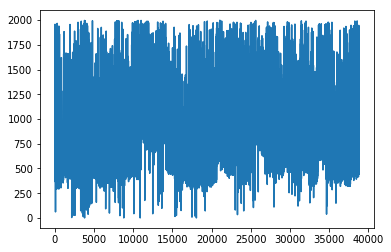

In [122]:
finished_taskdata[finished_taskdata['rt'] < 2000]['rt'].plot()

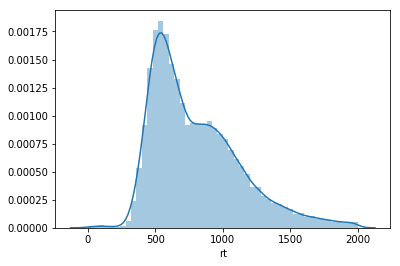

In [123]:
sns.distplot(finished_taskdata[finished_taskdata['rt'] < 2000]['rt'])

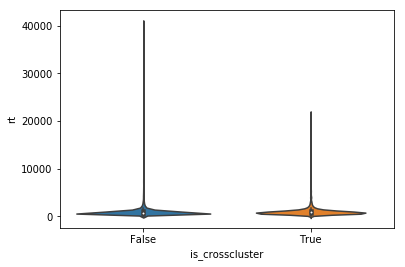

In [124]:
sns.violinplot(data=finished_taskdata, x='is_crosscluster', y="rt")

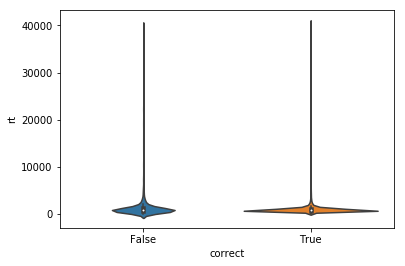

In [125]:
sns.violinplot(data=finished_taskdata, x='correct', y="rt")

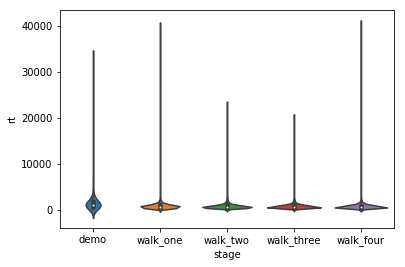

In [126]:
sns.violinplot(data=finished_taskdata, x='stage', y="rt")

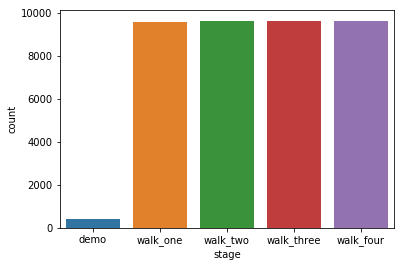

In [127]:
sns.countplot(data=finished_taskdata, x='stage')

In [128]:
finished_taskdata[finished_taskdata['stage'] == "walk_two"]["trial"].unique()
correct_data = finished_taskdata[finished_taskdata["event"] == "correct"]
# it is important to note that here, a correct trial is just when they pushed the right key, 
# even if they pushed the wrong key first. To make this comparable to ECoG data, you will have to remove all trials
# where nTries != 1

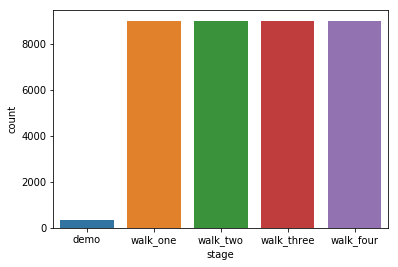

In [129]:
sns.countplot(data=correct_data, x='stage')

/Users/stiso/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/stiso/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/stiso/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/stiso/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/stiso/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
 

ZeroDivisionError: 0.0 cannot be raised to a negative power

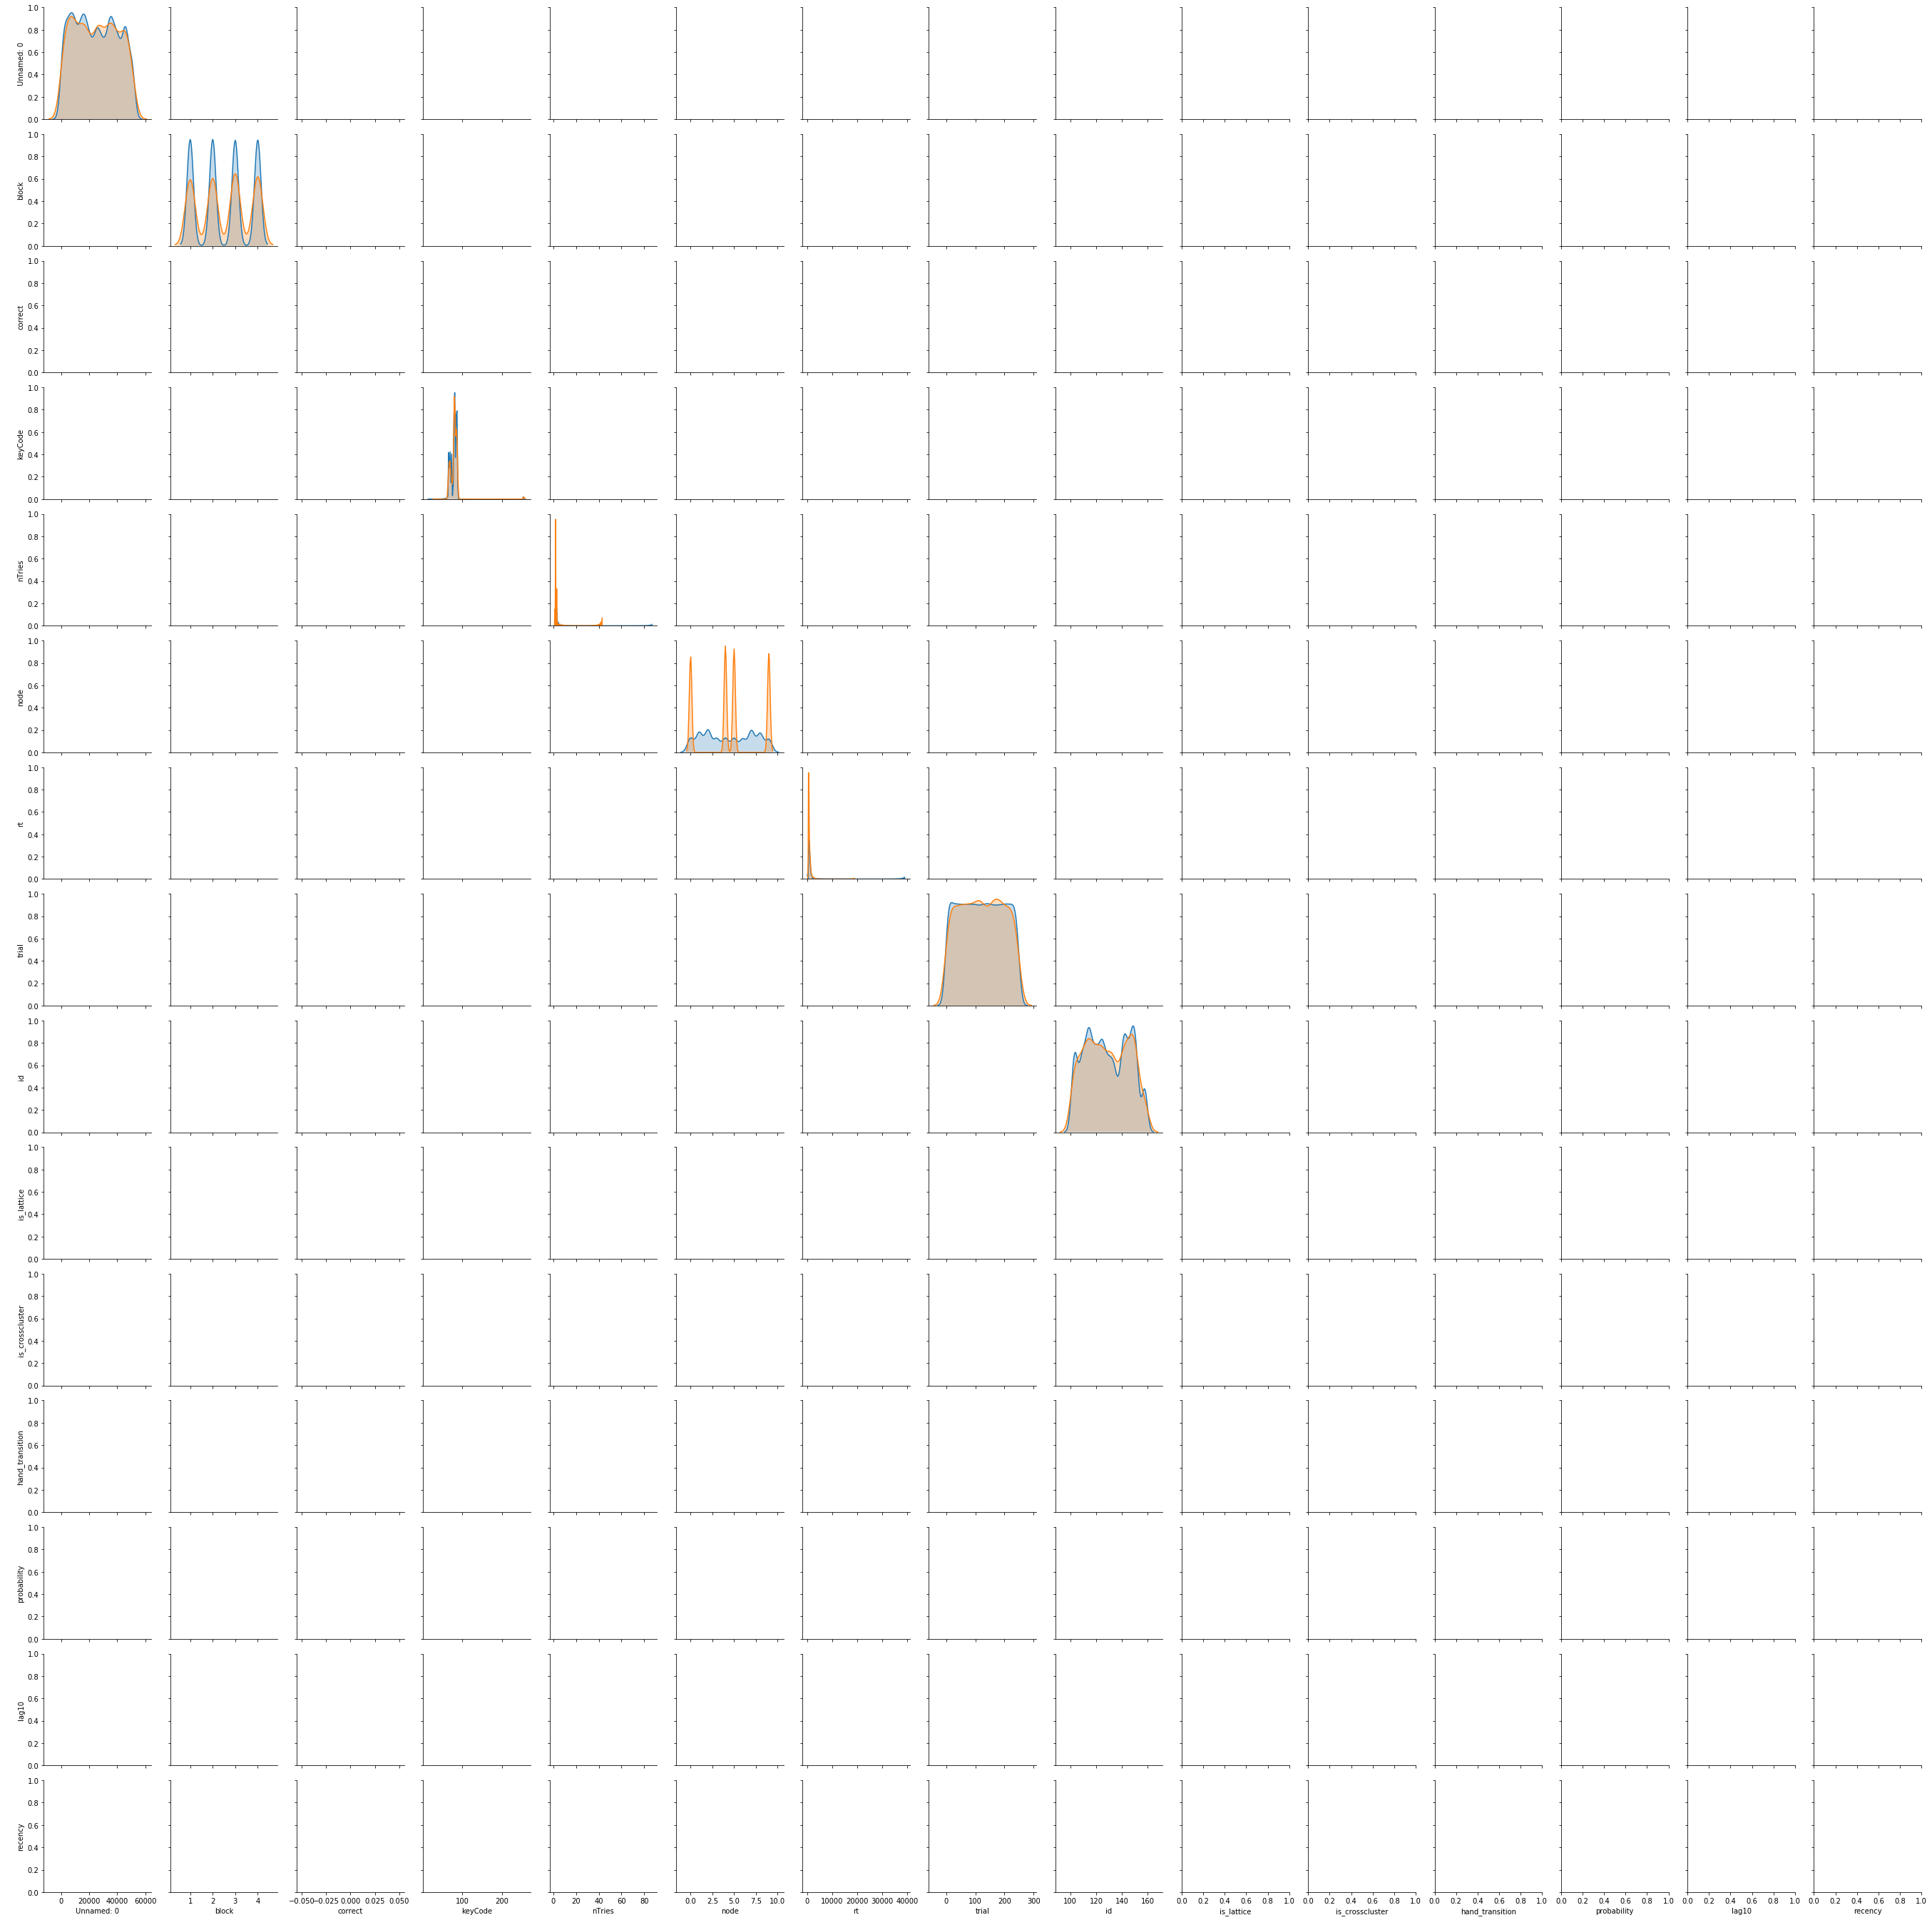

In [186]:
sns.pairplot(data=correct_data.drop(['assignmentid', 'event','query','response','target','uniqueid', 'workerid','walk_id'],axis=1), hue='is_crosscluster')

/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


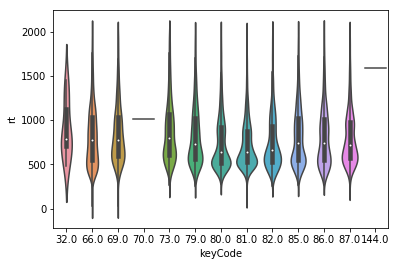

In [130]:
sns.violinplot(data=correct_data[finished_taskdata['rt'] < 2000], x='keyCode', y="rt")

In [133]:
correct_data[finished_taskdata['keyCode'] == 32].drop(['workerid'],axis=1)


/Users/stiso/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,block,correct,event,keyCode,nTries,node,phase,query,rt,...,trial,id,walk_id,is_lattice,is_crosscluster,hand,hand_transition,lag10,recency,probability
15124,15883,4.0,True,correct,32.0,1.0,9.0,task,0.0,697.0,...,135.0,198,98,NaN,False,NaN,True,1.0,10.0,0.10
24040,26872,1.0,True,correct,32.0,1.0,6.0,task,0.0,831.0,...,148.0,219,19,NaN,False,NaN,True,2.0,3.0,0.25
25394,28226,2.0,True,correct,32.0,2.0,6.0,task,0.0,1229.0,...,116.0,220,20,NaN,False,NaN,True,0.0,41.0,0.25
25397,28229,2.0,True,correct,32.0,1.0,6.0,task,0.0,1242.0,...,119.0,220,20,NaN,False,NaN,True,1.0,3.0,0.25
34627,40173,1.0,True,correct,32.0,2.0,9.0,task,0.0,785.0,...,26.0,231,31,NaN,False,NaN,True,0.0,14.0,0.10
34829,40375,1.0,True,correct,32.0,1.0,9.0,task,0.0,746.0,...,216.0,231,31,NaN,False,NaN,True,1.0,3.0,0.10
35214,40760,3.0,True,correct,32.0,2.0,9.0,task,0.0,1457.0,...,84.0,231,31,NaN,False,NaN,True,2.0,2.0,0.25
36012,41558,2.0,True,correct,32.0,2.0,2.0,task,0.0,478.0,...,84.0,236,36,NaN,False,NaN,True,4.0,2.0,0.70
37132,42722,2.0,True,correct,32.0,2.0,6.0,task,0.0,565.0,...,161.0,239,39,NaN,False,NaN,True,0.0,39.0,0.25
37595,43185,4.0,True,correct,32.0,2.0,1.0,task,0.0,793.0,...,111.0,239,39,NaN,False,NaN,True,2.0,3.0,0.25
